## Project Title
**Data-Driven Real Estate Valuation: Crime, Amenities & Location**

## Team Members
1. Vishveshwara Guthal (guthal)
2. Ariscia Mendes (amende17)
3. Swetha Narasimhan (Swetha1999)(POC)
4. Amaan Ali Khan (ak0477)

## Overview
**Objective**

We are developing a machine learning model to predict real estate prices more accurately by analyzing four critical factors:
1. Location
2. Property characteristics
3. Accessibility to amenities
4. Economic & crime data

**Impact & Stakeholders**

1. Real Estate Agents: Make informed pricing recommendations using AI-driven analytics.
2. Homebuyers & Investors: Get transparent, data-backed pricing insights, especially in high/low-crime areas.
3. Urban Planners & Local Authorities: Understand how crime and amenities shape housing demand for better policy decisions.

## DataSet 
https://data.cityofnewyork.us/Public-Safety/lat-and-long-google-maps/rjv2-9zvt/about_data


## Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')


## Importing Data
**Import the unclean, raw, scraped data from Realtor.com**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("unclean.csv" )

In [3]:
df["Property Value"].min()

'$1'

In [4]:
df['Zip Code'] = df['Address line 2'].str.extract(r'(\d{5})')

**Display Dataset using head function**

In [5]:
df = df.dropna(subset=['Zip Code']).copy()
df.shape

(16610, 46)

**Dropping rows with missing target variable**

In [6]:
df.drop_duplicates(keep="first", inplace=True)
print("Duplicates removed. New shape:", df.shape)

Duplicates removed. New shape: (10469, 46)


**Dropping rows with missing target variable**

In [7]:
df = df.dropna(subset=['Property Value']).copy()

## Removing unwanted columns
**Removing irrelevant columns to our model such as the property URL, Address data, etc.**

In [8]:
columns_to_drop = [
    "Property Link",
    "Address line 1",
    "Address line 2",
    "Full Address_x",
    "Full Address_y",
    "\r\nbed",
    "appreciate/depreciate",
    
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [9]:
df.columns

Index(['Type of House', 'Property Value', 'bed', 'bath', '\nbed',
       'Area (Sqft)',
       'PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0',
       'lot size', 'Latitude', 'Longitude', 'Number_of_Parks_Nearby',
       'Distance_to_Nearest_Parks_miles', 'Number_of_Malls_Nearby',
       'Distance_to_Nearest_Malls_miles', 'Number_of_Metros_Nearby',
       'Distance_to_Nearest_Metros_miles', 'Number_of_Clubs_Nearby',
       'Distance_to_Nearest_Clubs_miles', 'Number_of_Restaurants_Nearby',
       'Distance_to_Nearest_Restaurants_miles', 'Number_of_Schools_Nearby',
       'Distance_to_Nearest_Schools_miles', 'Number_of_Colleges_Nearby',
       'Distance_to_Nearest_Colleges_miles', 'Number_of_Universities_Nearby',
       'Distance_to_Nearest_Universities_miles', 'Number_of_Buses_Nearby',
       'Distance_to_Nearest_Buses_miles', 'Number_of_Trains_Nearby',
       'Distance_to_Nearest_Trains_miles', 'Number_of_Airports_Nearby',
       'Distance_to_Nearest_Airports_m

## Converting datatypes
**Remove "$" from target and convert to numerical.**

In [10]:
df["Property Value"] = (
    df["Property Value"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df = df[df["Property Value"].str.replace(".", "", regex=False).str.isnumeric()]

df["Property Value"] = df["Property Value"].astype(float)

print(df["Property Value"].head())


0    150000000.0
1       649000.0
2      6999999.0
3     18000000.0
4       274000.0
Name: Property Value, dtype: float64


In [11]:
df.columns

Index(['Type of House', 'Property Value', 'bed', 'bath', '\nbed',
       'Area (Sqft)',
       'PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0',
       'lot size', 'Latitude', 'Longitude', 'Number_of_Parks_Nearby',
       'Distance_to_Nearest_Parks_miles', 'Number_of_Malls_Nearby',
       'Distance_to_Nearest_Malls_miles', 'Number_of_Metros_Nearby',
       'Distance_to_Nearest_Metros_miles', 'Number_of_Clubs_Nearby',
       'Distance_to_Nearest_Clubs_miles', 'Number_of_Restaurants_Nearby',
       'Distance_to_Nearest_Restaurants_miles', 'Number_of_Schools_Nearby',
       'Distance_to_Nearest_Schools_miles', 'Number_of_Colleges_Nearby',
       'Distance_to_Nearest_Colleges_miles', 'Number_of_Universities_Nearby',
       'Distance_to_Nearest_Universities_miles', 'Number_of_Buses_Nearby',
       'Distance_to_Nearest_Buses_miles', 'Number_of_Trains_Nearby',
       'Distance_to_Nearest_Trains_miles', 'Number_of_Airports_Nearby',
       'Distance_to_Nearest_Airports_m

## Normalize units (lot size)
**Creating a derived variable called "Total lot size" from "lot type" and "lot size"**

In [12]:
df.rename(
    columns={"PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0": "lot type"},
    inplace=True
)

df["lot size"] = pd.to_numeric(df["lot size"].astype(str).str.replace(",", ""), errors="coerce")
df["Area (Sqft)"] = pd.to_numeric(df["Area (Sqft)"].astype(str).str.replace(",", ""), errors="coerce")

# 3. Compute total lot size based on logic
def compute_total_lot_size(row):
    lot_type = str(row["lot type"]).lower() if pd.notna(row["lot type"]) else ""
    lot_size = row["lot size"]
    area_sqft = row["Area (Sqft)"]

    if "acre lot" in lot_type and pd.notna(lot_size):
        return lot_size * 43560
    elif "sqft lot" in lot_type and pd.notna(lot_size):
        return lot_size
    else:
        return area_sqft  

df["total lot size(sqft)"] = df.apply(compute_total_lot_size, axis=1)

df["total lot size(sqft)"] = pd.to_numeric(df["total lot size(sqft)"], errors="coerce")

In [13]:
df.drop(columns=["lot size", "lot type"], inplace=True)

In [14]:
df.head()

,Type of House,Property Value,bed,bath,\nbed,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Distance_to_Nearest_Parks_miles,...,Distance_to_Nearest_Airports_miles,Number_of_Museums_Nearby,Distance_to_Nearest_Museums_miles,Number_of_Libraries_Nearby,Distance_to_Nearest_Libraries_miles,Number_of_Grocery_stores_Nearby,Distance_to_Nearest_Grocery_stores_miles,borough,Zip Code,total lot size(sqft)
0,Condo for sale,150000000.0,8,10,8.0,11535.0,40.766474,-73.981266,16,0.516540,...,2.205337,34,0.466477,26,0.228443,194,0.151832,Manhattan,10019,11535.0
1,Condo for sale,649000.0,3,2.5,3.0,2431.0,40.826130,-73.943006,37,0.057431,...,inf,14,0.313484,9,0.372547,101,0.235285,Manhattan,10031,2431.0
2,Townhouse for sale,6999999.0,6,6.5+,6.0,7200.0,40.787587,-73.969240,19,0.148955,...,inf,17,0.458300,22,0.580740,154,0.129664,Manhattan,10024,7200.0
3,House for sale,18000000.0,8,16.5,8.0,33000.0,40.595008,-74.106434,1,1.515412,...,inf,4,2.116247,1,1.616244,22,1.005562,Staten Island,10304,68824.8
4,House for sale,274000.0,3,1,3.0,1556.0,40.675746,-73.822413,14,0.953825,...,inf,0,inf,1,1.638993,52,0.216965,Queens,11420,2400.0


## Handling missing values through imputation

**Displaying missing values**

In [15]:
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

print("\n--- Numeric Summary ---")
print(df.describe(include='number'))



--- Missing Values per Column ---
Type of House                                  0
Property Value                                 0
bed                                          206
bath                                         315
\nbed                                       7722
Area (Sqft)                                 2799
Latitude                                       0
Longitude                                      0
Number_of_Parks_Nearby                         0
Distance_to_Nearest_Parks_miles                0
Number_of_Malls_Nearby                         0
Distance_to_Nearest_Malls_miles                0
Number_of_Metros_Nearby                        0
Distance_to_Nearest_Metros_miles               0
Number_of_Clubs_Nearby                         0
Distance_to_Nearest_Clubs_miles                0
Number_of_Restaurants_Nearby                   0
Distance_to_Nearest_Restaurants_miles          0
Number_of_Schools_Nearby                       0
Distance_to_Nearest_Schools_miles 

**For "Bed" and "Bath" we impute using mode**

In [16]:
most_common_bed = df["bed"].mode()[0]
df["bed"].fillna(most_common_bed, inplace=True)

median_bath = df["bath"].mode()[0]
df["bath"].fillna(median_bath, inplace=True)

**For Area sq.ft we fill missing Area using group-wise median**

In [17]:
df["Area (Sqft)"] = (
    df["Area (Sqft)"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .replace("nan", np.nan) 
    .astype(float)
)

In [18]:
# Backup original Area column
df["Area (Sqft)_original"] = df["Area (Sqft)"]

# Fill missing 'bed' with mode and convert to string
df["bed"] = df["bed"].fillna(df["bed"].mode()[0])
df["bed"] = df["bed"].astype(str)

# Fill missing 'bath' with mode and convert to string
df["bath"] = df["bath"].fillna(df["bath"].mode()[0])
df["bath"] = df["bath"].astype(str)

# Fill missing 'Property Value' with median
df["Property Value"] = df["Property Value"].fillna(df["Property Value"].median())

# Prepare grouped median dictionaries
grouped_medians = df.groupby(["bed", "bath", "Type of House", "borough", "Property Value"])["Area (Sqft)"].median().to_dict()
fallback_medians = df.groupby(["bed", "bath", "borough", "Property Value"])["Area (Sqft)"].median().to_dict()
bed_medians = df.groupby("bed")["Area (Sqft)"].median().to_dict()

# Define the imputation function
def impute_area(row):
    if pd.isna(row["Area (Sqft)"]):
        key_1 = (row["bed"], row["bath"], row["Type of House"], row["borough"], row["Property Value"])
        key_2 = (row["bed"], row["bath"], row["borough"], row["Property Value"])
        
        group_median = grouped_medians.get(key_1)
        if pd.notna(group_median):
            return group_median
        
        group_median = fallback_medians.get(key_2)
        if pd.notna(group_median):
            return group_median
        
        group_median = bed_medians.get(row["bed"])
        if pd.notna(group_median):
            return group_median
        
        return df["Area (Sqft)"].median()
    
    return row["Area (Sqft)"]

# Apply the imputation
df["Area (Sqft)"] = df.apply(impute_area, axis=1)


**We Impute in same way for Total Lot size(sqft)**

In [19]:
# Backup original total lot size column
df["total lot size(sqft)_original"] = df["total lot size(sqft)"]

# Fill missing values and convert to strings for consistency
df["bed"] = df["bed"].fillna(df["bed"].mode()[0]).astype(str)
df["bath"] = df["bath"].fillna(df["bath"].mode()[0]).astype(str)

# Fill missing Property Value with median
df["Property Value"] = df["Property Value"].fillna(df["Property Value"].median())

# Create grouped median lookup dictionaries
grouped_medians = df.groupby(["bed", "bath", "Type of House", "borough", "Property Value"])["total lot size(sqft)"].median().to_dict()
fallback_medians = df.groupby(["bed", "bath", "borough", "Property Value"])["total lot size(sqft)"].median().to_dict()
bed_medians = df.groupby("bed")["total lot size(sqft)"].median().to_dict()

# Imputation function
def impute_total_lot_size(row):
    if pd.isna(row["total lot size(sqft)"]):
        key_1 = (row["bed"], row["bath"], row["Type of House"], row["borough"], row["Property Value"])
        key_2 = (row["bed"], row["bath"], row["borough"], row["Property Value"])

        group_median = grouped_medians.get(key_1)
        if pd.notna(group_median):
            return group_median

        group_median = fallback_medians.get(key_2)
        if pd.notna(group_median):
            return group_median

        group_median = bed_medians.get(row["bed"])
        if pd.notna(group_median):
            return group_median

        return df["total lot size(sqft)"].median()

    return row["total lot size(sqft)"]

# Apply imputation
df["total lot size(sqft)"] = df.apply(impute_total_lot_size, axis=1)


In [20]:
df.drop(columns=["Area (Sqft)_original", "total lot size(sqft)_original"], inplace=True)

In [21]:
df.drop(columns=["\nbed"], inplace=True)

**checking missing values once again after imputation**

In [22]:
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

print("\n--- Numeric Summary ---")
print(df.describe(include='number'))



--- Missing Values per Column ---
Type of House                               0
Property Value                              0
bed                                         0
bath                                        0
Area (Sqft)                                 0
Latitude                                    0
Longitude                                   0
Number_of_Parks_Nearby                      0
Distance_to_Nearest_Parks_miles             0
Number_of_Malls_Nearby                      0
Distance_to_Nearest_Malls_miles             0
Number_of_Metros_Nearby                     0
Distance_to_Nearest_Metros_miles            0
Number_of_Clubs_Nearby                      0
Distance_to_Nearest_Clubs_miles             0
Number_of_Restaurants_Nearby                0
Distance_to_Nearest_Restaurants_miles       0
Number_of_Schools_Nearby                    0
Distance_to_Nearest_Schools_miles           0
Number_of_Colleges_Nearby                   0
Distance_to_Nearest_Colleges_miles          0

In [23]:
df.head()

,Type of House,Property Value,bed,bath,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Distance_to_Nearest_Parks_miles,Number_of_Malls_Nearby,...,Distance_to_Nearest_Airports_miles,Number_of_Museums_Nearby,Distance_to_Nearest_Museums_miles,Number_of_Libraries_Nearby,Distance_to_Nearest_Libraries_miles,Number_of_Grocery_stores_Nearby,Distance_to_Nearest_Grocery_stores_miles,borough,Zip Code,total lot size(sqft)
0,Condo for sale,150000000.0,8,10,11535.0,40.766474,-73.981266,16,0.516540,3,...,2.205337,34,0.466477,26,0.228443,194,0.151832,Manhattan,10019,11535.0
1,Condo for sale,649000.0,3,2.5,2431.0,40.826130,-73.943006,37,0.057431,0,...,inf,14,0.313484,9,0.372547,101,0.235285,Manhattan,10031,2431.0
2,Townhouse for sale,6999999.0,6,6.5+,7200.0,40.787587,-73.969240,19,0.148955,2,...,inf,17,0.458300,22,0.580740,154,0.129664,Manhattan,10024,7200.0
3,House for sale,18000000.0,8,16.5,33000.0,40.595008,-74.106434,1,1.515412,0,...,inf,4,2.116247,1,1.616244,22,1.005562,Staten Island,10304,68824.8
4,House for sale,274000.0,3,1,1556.0,40.675746,-73.822413,14,0.953825,1,...,inf,0,inf,1,1.638993,52,0.216965,Queens,11420,2400.0


In [24]:
df.shape

(10468, 38)

## Handling Outliers

In [25]:
numeric_cols = [
    "Property Value",
    "Area (Sqft)",
    "total lot size(sqft)",
    "Number_of_Parks_Nearby",
    "Number_of_Malls_Nearby",
    "Number_of_Metros_Nearby",
    "Number_of_Clubs_Nearby",
    "Number_of_Restaurants_Nearby",
    "Number_of_Schools_Nearby",
    "Number_of_Colleges_Nearby",
    "Number_of_Universities_Nearby",
    "Number_of_Buses_Nearby",
    "Number_of_Trains_Nearby",
    "Number_of_Airports_Nearby",
    "Number_of_Museums_Nearby",
    "Number_of_Libraries_Nearby",
    "Number_of_Grocery_stores_Nearby"
]

In [26]:
min_caps = {
    "Property Value": (50000, 6668000),
    "Area (Sqft)": (200, 6425),
    "total lot size(sqft)": (200, 13780),
    "Number_of_Parks_Nearby": (0, 57),
    "Number_of_Malls_Nearby": (0, 3),
    "Number_of_Metros_Nearby": (0, 165),
    "Number_of_Clubs_Nearby": (0, 57),
    "Number_of_Restaurants_Nearby": (0, 3475),
    "Number_of_Schools_Nearby": (0, 233),
    "Number_of_Colleges_Nearby": (0, 16),
    "Number_of_Universities_Nearby": (0, 23),
    "Number_of_Buses_Nearby": (0, 1928),
    "Number_of_Trains_Nearby": (0, 171),
    "Number_of_Airports_Nearby": (0, 2),
    "Number_of_Museums_Nearby": (0, 50),
    "Number_of_Libraries_Nearby": (0, 29),
    "Number_of_Grocery_stores_Nearby": (0, 246)
}

In [27]:
# Corrected function
def clip_outliers_iqr(df, columns, iqr_factor=1.5, min_caps=None):
    df_clipped = df.copy()
    for col in columns:
        if col in df_clipped.columns:
            Q1 = df_clipped[col].quantile(0.15)
            Q3 = df_clipped[col].quantile(0.85)
            IQR = Q3 - Q1
            lower = Q1 - iqr_factor * IQR
            upper = Q3 + iqr_factor * IQR

            # If min_caps provided, override both lower and upper bounds
            if min_caps and col in min_caps:
                lower = max(lower, min_caps[col][0])  # min value from min_caps
                upper = min(upper, min_caps[col][1])  # max value from min_caps

            before_min = df_clipped[col].min()
            before_max = df_clipped[col].max()

            # Clip the column
            df_clipped[col] = df_clipped[col].clip(lower=lower, upper=upper)

            print(f"{col}: clipped to [{lower:,.0f}, {upper:,.0f}] | Before: ({before_min:,.0f}, {before_max:,.0f}) → After: ({df_clipped[col].min():,.0f}, {df_clipped[col].max():,.0f})")
    return df_clipped

# Now apply it
df = clip_outliers_iqr(df, numeric_cols, iqr_factor=1.5, min_caps=min_caps)

# Check new shape
print(df.shape)

Property Value: clipped to [50,000, 6,668,000] | Before: (1, 150,000,000) → After: (50,000, 6,668,000)
Area (Sqft): clipped to [200, 6,425] | Before: (167, 212,250) → After: (200, 6,425)
total lot size(sqft): clipped to [200, 13,780] | Before: (167, 95,091,480) → After: (200, 13,780)
Number_of_Parks_Nearby: clipped to [0, 57] | Before: (0, 57) → After: (0, 57)
Number_of_Malls_Nearby: clipped to [0, 3] | Before: (0, 3) → After: (0, 3)
Number_of_Metros_Nearby: clipped to [0, 165] | Before: (0, 165) → After: (0, 165)
Number_of_Clubs_Nearby: clipped to [0, 57] | Before: (0, 57) → After: (0, 57)
Number_of_Restaurants_Nearby: clipped to [0, 3,475] | Before: (0, 3,475) → After: (0, 3,475)
Number_of_Schools_Nearby: clipped to [0, 233] | Before: (0, 233) → After: (0, 233)
Number_of_Colleges_Nearby: clipped to [0, 16] | Before: (0, 16) → After: (0, 16)
Number_of_Universities_Nearby: clipped to [0, 23] | Before: (0, 23) → After: (0, 23)
Number_of_Buses_Nearby: clipped to [0, 1,928] | Before: (0, 

In [28]:
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

print("\n--- Numeric Summary ---")
print(df.describe(include='number'))



--- Missing Values per Column ---
Type of House                               0
Property Value                              0
bed                                         0
bath                                        0
Area (Sqft)                                 0
Latitude                                    0
Longitude                                   0
Number_of_Parks_Nearby                      0
Distance_to_Nearest_Parks_miles             0
Number_of_Malls_Nearby                      0
Distance_to_Nearest_Malls_miles             0
Number_of_Metros_Nearby                     0
Distance_to_Nearest_Metros_miles            0
Number_of_Clubs_Nearby                      0
Distance_to_Nearest_Clubs_miles             0
Number_of_Restaurants_Nearby                0
Distance_to_Nearest_Restaurants_miles       0
Number_of_Schools_Nearby                    0
Distance_to_Nearest_Schools_miles           0
Number_of_Colleges_Nearby                   0
Distance_to_Nearest_Colleges_miles          0

#### Feature Engineering (Binning)

In [29]:
import numpy as np
import pandas as pd

distance_cols = [col for col in df.columns if "Distance_to" in col and "miles" in col]

bins = [0, 1, 2, 3, 4, np.inf]
labels = ["0–1 miles", "1–2 miles", "2–3 miles", "3–4 miles", "4+ miles"]

for col in distance_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    binned_col = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    binned_col = binned_col.fillna("4+ miles")
    new_col_name = f"{col}_binned"
    df[new_col_name] = binned_col

    df.drop(columns=[col], inplace=True)


In [30]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Type of House', 'bed', 'bath', 'borough', 'Zip Code', 'Distance_to_Nearest_Parks_miles_binned', 'Distance_to_Nearest_Malls_miles_binned', 'Distance_to_Nearest_Metros_miles_binned', 'Distance_to_Nearest_Clubs_miles_binned', 'Distance_to_Nearest_Restaurants_miles_binned', 'Distance_to_Nearest_Schools_miles_binned', 'Distance_to_Nearest_Colleges_miles_binned', 'Distance_to_Nearest_Universities_miles_binned', 'Distance_to_Nearest_Buses_miles_binned', 'Distance_to_Nearest_Trains_miles_binned', 'Distance_to_Nearest_Airports_miles_binned', 'Distance_to_Nearest_Museums_miles_binned', 'Distance_to_Nearest_Libraries_miles_binned', 'Distance_to_Nearest_Grocery_stores_miles_binned']


## Encoding categorical values using One-Hot encoding

In [31]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df_encoded.head()

,Property Value,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Number_of_Malls_Nearby,Number_of_Metros_Nearby,Number_of_Clubs_Nearby,Number_of_Restaurants_Nearby,Number_of_Schools_Nearby,...,Distance_to_Nearest_Museums_miles_binned_3–4 miles,Distance_to_Nearest_Museums_miles_binned_4+ miles,Distance_to_Nearest_Libraries_miles_binned_1–2 miles,Distance_to_Nearest_Libraries_miles_binned_2–3 miles,Distance_to_Nearest_Libraries_miles_binned_3–4 miles,Distance_to_Nearest_Libraries_miles_binned_4+ miles,Distance_to_Nearest_Grocery_stores_miles_binned_1–2 miles,Distance_to_Nearest_Grocery_stores_miles_binned_2–3 miles,Distance_to_Nearest_Grocery_stores_miles_binned_3–4 miles,Distance_to_Nearest_Grocery_stores_miles_binned_4+ miles
0,6668000.0,6425.0,40.766474,-73.981266,16,3,110,30,2786,165,...,0,0,0,0,0,0,0,0,0,0
1,649000.0,2431.0,40.826130,-73.943006,37,0,72,5,572,220,...,0,0,0,0,0,0,0,0,0,0
2,6668000.0,6425.0,40.787587,-73.969240,19,2,88,7,1933,192,...,0,0,0,0,0,0,0,0,0,0
3,6668000.0,6425.0,40.595008,-74.106434,1,0,7,1,173,16,...,0,0,1,0,0,0,1,0,0,0
4,274000.0,1556.0,40.675746,-73.822413,14,1,30,7,252,32,...,0,1,1,0,0,0,0,0,0,0


In [33]:
res = df_encoded.columns
print(res)


Index(['Property Value', 'Area (Sqft)', 'Latitude', 'Longitude',
       'Number_of_Parks_Nearby', 'Number_of_Malls_Nearby',
       'Number_of_Metros_Nearby', 'Number_of_Clubs_Nearby',
       'Number_of_Restaurants_Nearby', 'Number_of_Schools_Nearby',
       ...
       'Distance_to_Nearest_Museums_miles_binned_3–4 miles',
       'Distance_to_Nearest_Museums_miles_binned_4+ miles',
       'Distance_to_Nearest_Libraries_miles_binned_1–2 miles',
       'Distance_to_Nearest_Libraries_miles_binned_2–3 miles',
       'Distance_to_Nearest_Libraries_miles_binned_3–4 miles',
       'Distance_to_Nearest_Libraries_miles_binned_4+ miles',
       'Distance_to_Nearest_Grocery_stores_miles_binned_1–2 miles',
       'Distance_to_Nearest_Grocery_stores_miles_binned_2–3 miles',
       'Distance_to_Nearest_Grocery_stores_miles_binned_3–4 miles',
       'Distance_to_Nearest_Grocery_stores_miles_binned_4+ miles'],
      dtype='object', length=350)


## Visualization

## Analyzing Numeric Feature Distributions
Generated boxplots for all numeric columns to examine their distributions. These visualizations help us identify key characteristics like median values, data spread (IQR), and potential outliers.

## Analyzing Feature Relationships with Property Value
To identify which features most influence property prices, we plot each numeric variable against Property Value. Scatter plots help reveal correlations, outliers, and potential non-linear trends. Strong relationships may become key predictors, while weak or noisy ones could be removal.

## Analyzing Property Value by Categorical Features
We examine how property values vary across different categories using bar plots. These visualizations help identify which categorical factors (like property type or borough) show significant differences in average home prices. The plots will reveal potential patterns that could be valuable for our predictive model.

## Geospatial Analysis of Property Values
This scatter plot visualizes property locations using longitude and latitude coordinates, with color and point size representing property values. The visualization helps identify Geographic price clusters (high-value neighborhoods), Location-based price trends, and Potential spatial patterns that could inform location-based features in our model.

## Log Transformation and Visualization of Target Variable
Applied a log transformation to the target variable to reduce its right skewness.

<Axes: >

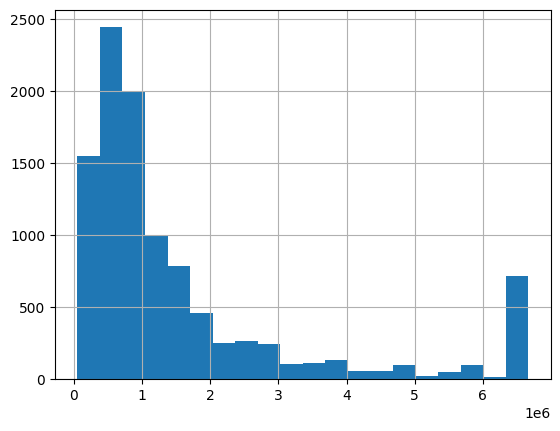

In [37]:
df['Property Value'].hist(bins = 20)

<Axes: >

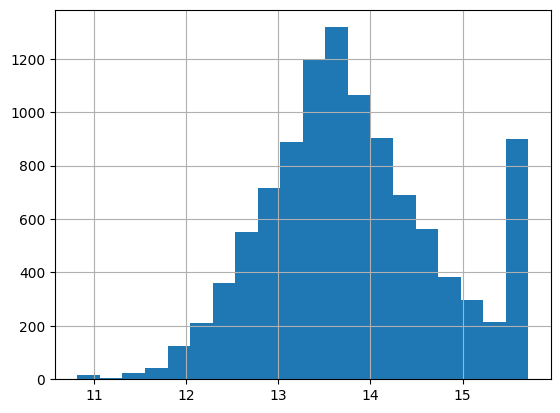

In [38]:
import matplotlib.pyplot as plt
df_encoded['Property Value_log'] = np.log1p(df_encoded['Property Value'])
df_encoded['Property Value_log'].hist(bins = 20)


## Correlation Map
This correlation heatmap focuses only on relationships with coefficients above 0.5, highlighting the strongest positive and negative associations in our dataset. By filtering for these significant correlations, we can identify the redundant features which can be removed, and key predictors that show strong relationships with our target variable (Property Value).

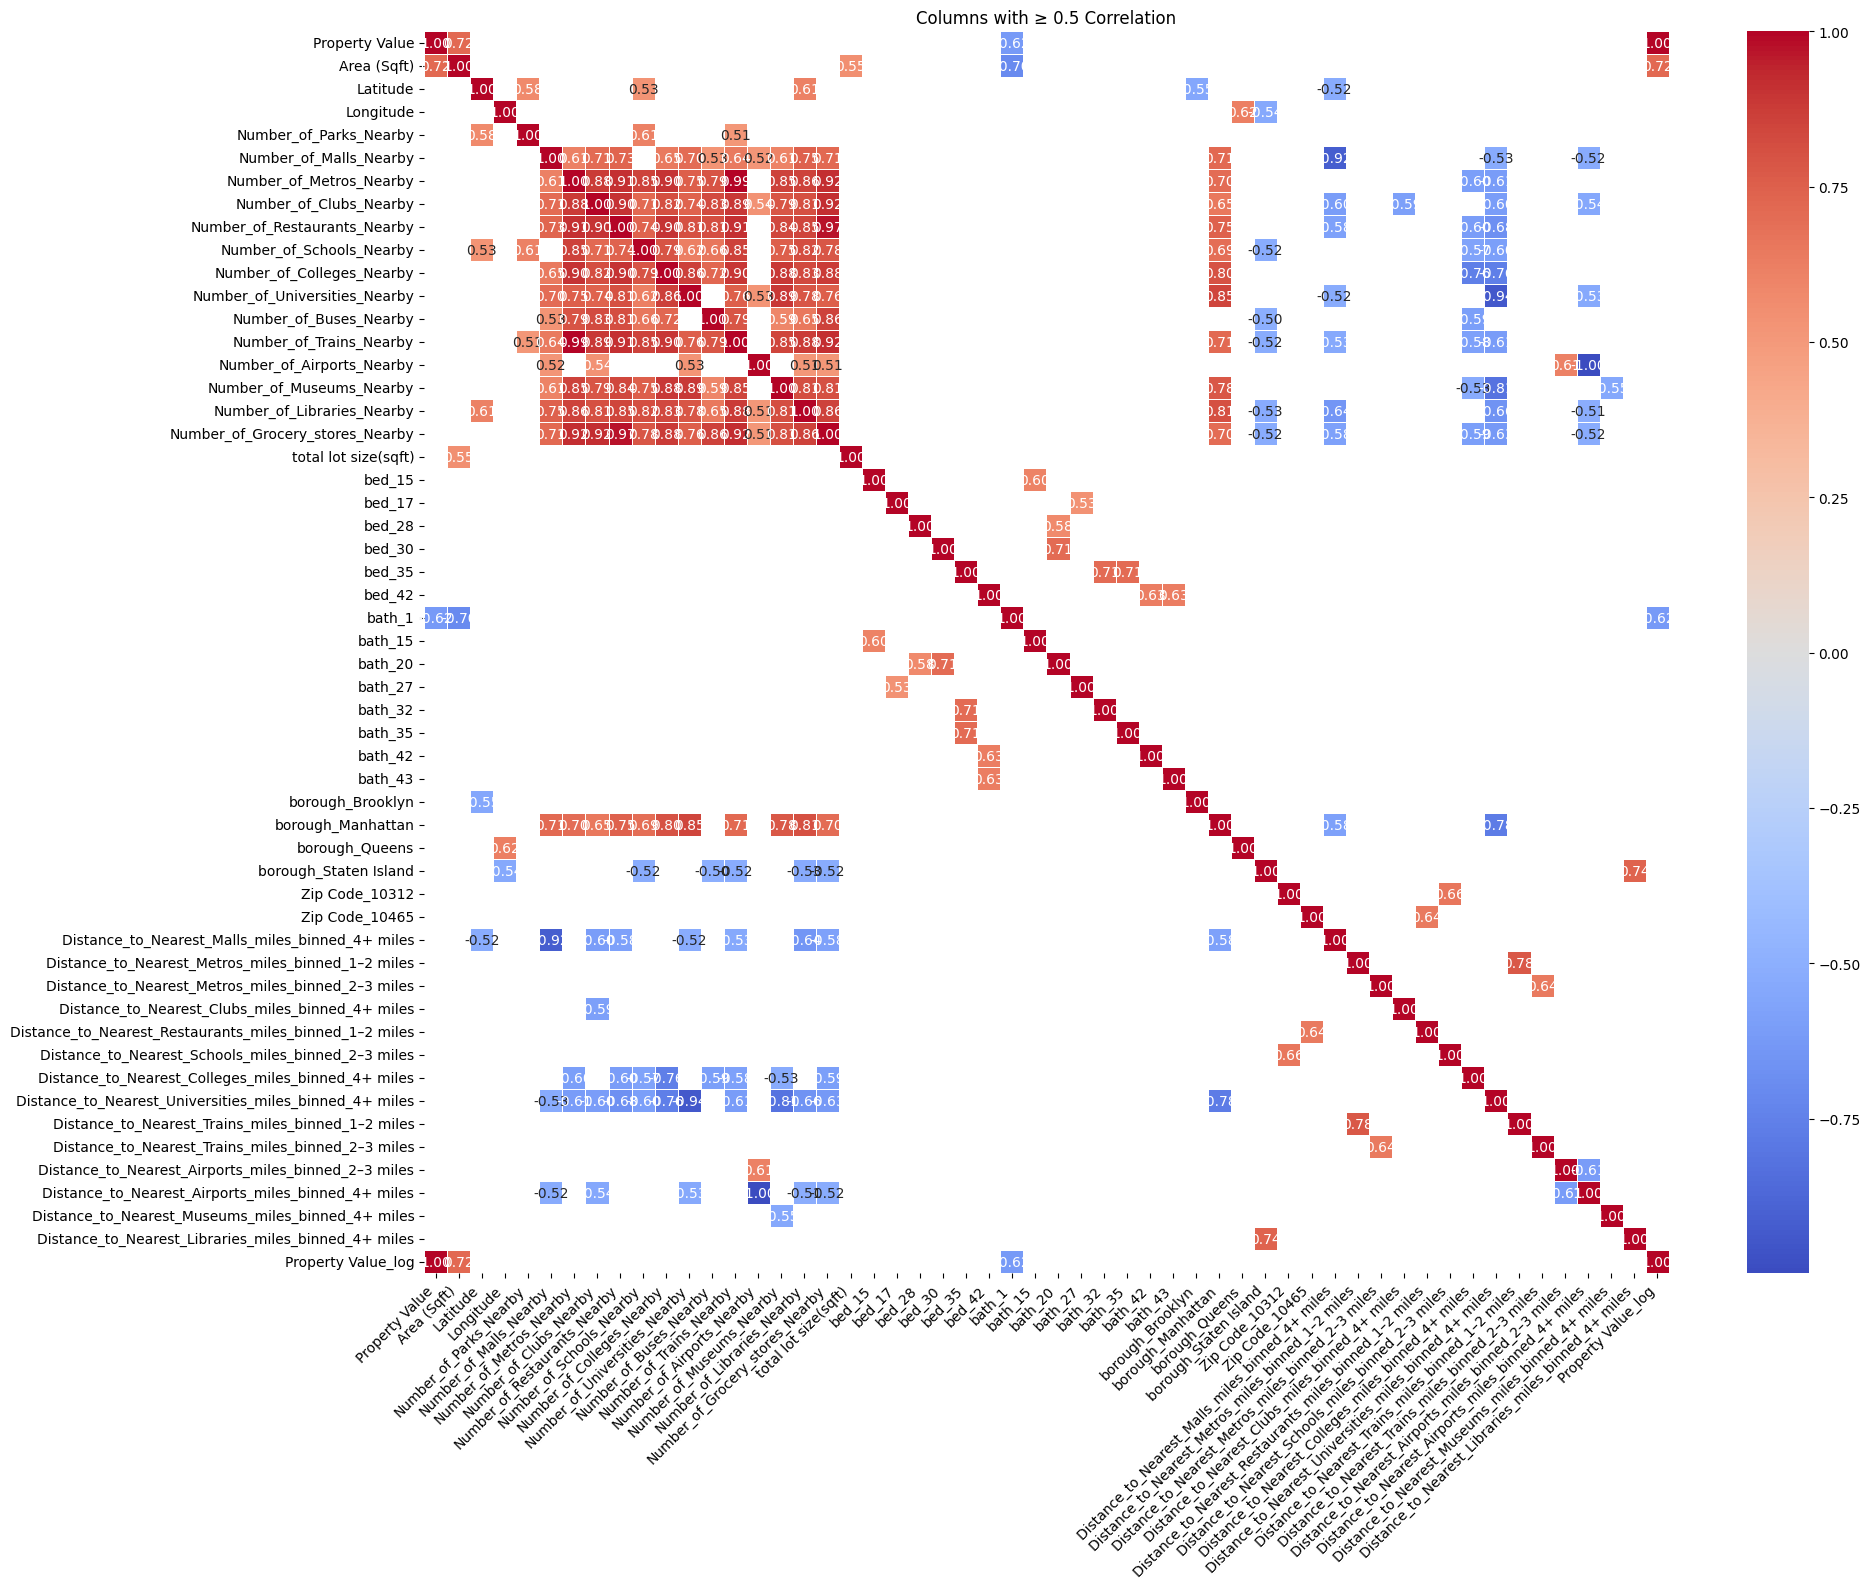

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_encoded.corr(method='spearman')
threshold = 0.5

high_corr_cols = [
    col for col in corr_matrix.columns 
    if ((corr_matrix[col].abs() >= threshold) & (corr_matrix[col] != 1)).any()
]
filtered_corr = corr_matrix.loc[high_corr_cols, high_corr_cols]

plt.figure(figsize=(20, 16))
sns.heatmap(
    filtered_corr,
    annot=True,          
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    mask=(filtered_corr.abs() < threshold)  
)
plt.title(f"Columns with ≥ {threshold} Correlation")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
df_final = df_encoded.copy()

In [41]:
df_final.drop(columns=["Property Value"], inplace=True)
df_final

,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Number_of_Malls_Nearby,Number_of_Metros_Nearby,Number_of_Clubs_Nearby,Number_of_Restaurants_Nearby,Number_of_Schools_Nearby,Number_of_Colleges_Nearby,...,Distance_to_Nearest_Museums_miles_binned_4+ miles,Distance_to_Nearest_Libraries_miles_binned_1–2 miles,Distance_to_Nearest_Libraries_miles_binned_2–3 miles,Distance_to_Nearest_Libraries_miles_binned_3–4 miles,Distance_to_Nearest_Libraries_miles_binned_4+ miles,Distance_to_Nearest_Grocery_stores_miles_binned_1–2 miles,Distance_to_Nearest_Grocery_stores_miles_binned_2–3 miles,Distance_to_Nearest_Grocery_stores_miles_binned_3–4 miles,Distance_to_Nearest_Grocery_stores_miles_binned_4+ miles,Property Value_log
0,6425.0,40.766474,-73.981266,16,3,110,30,2786,165,12,...,0,0,0,0,0,0,0,0,0,15.712831
1,2431.0,40.826130,-73.943006,37,0,72,5,572,220,4,...,0,0,0,0,0,0,0,0,0,13.383190
2,6425.0,40.787587,-73.969240,19,2,88,7,1933,192,9,...,0,0,0,0,0,0,0,0,0,15.712831
3,6425.0,40.595008,-74.106434,1,0,7,1,173,16,0,...,0,1,0,0,0,1,0,0,0,15.712831
4,1556.0,40.675746,-73.822413,14,1,30,7,252,32,1,...,1,1,0,0,0,0,0,0,0,12.520887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,832.0,40.705254,-74.010340,17,1,106,29,2371,165,9,...,0,0,0,0,0,0,0,0,0,14.070154
16608,1100.0,40.880917,-73.834635,25,0,24,1,83,72,1,...,0,0,1,0,0,0,0,0,0,11.918397
16609,2750.0,40.689108,-73.913931,33,0,83,24,817,150,2,...,0,0,1,0,0,0,0,0,0,13.989465
16610,875.0,40.722400,-73.856690,12,2,45,13,827,57,1,...,0,1,0,0,0,0,0,0,0,13.120363


## Splitting data set

In [42]:
X = df_final.drop(columns=["Property Value_log"])
y = df_final["Property Value_log"]


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Applying standard scalar

In [44]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


## Modeling

**Trying RandomForestRegresoor**

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.29
R² Score: 0.9085


## Problems & Challenges

## Next steps
safety score

In [47]:
df.columns

Index(['Type of House', 'Property Value', 'bed', 'bath', 'Area (Sqft)',
       'Latitude', 'Longitude', 'Number_of_Parks_Nearby',
       'Number_of_Malls_Nearby', 'Number_of_Metros_Nearby',
       'Number_of_Clubs_Nearby', 'Number_of_Restaurants_Nearby',
       'Number_of_Schools_Nearby', 'Number_of_Colleges_Nearby',
       'Number_of_Universities_Nearby', 'Number_of_Buses_Nearby',
       'Number_of_Trains_Nearby', 'Number_of_Airports_Nearby',
       'Number_of_Museums_Nearby', 'Number_of_Libraries_Nearby',
       'Number_of_Grocery_stores_Nearby', 'borough', 'Zip Code',
       'total lot size(sqft)', 'Distance_to_Nearest_Parks_miles_binned',
       'Distance_to_Nearest_Malls_miles_binned',
       'Distance_to_Nearest_Metros_miles_binned',
       'Distance_to_Nearest_Clubs_miles_binned',
       'Distance_to_Nearest_Restaurants_miles_binned',
       'Distance_to_Nearest_Schools_miles_binned',
       'Distance_to_Nearest_Colleges_miles_binned',
       'Distance_to_Nearest_Universities_mi

In [50]:
import pandas as pd

# Load data
nypd = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date__20250407.csv')

# Display initial size
print(f"Size of the DataFrame Before removing blank data: {len(nypd)}")

# Define the columns you want
required_cols = ['Latitude', 'Longitude', 'OFNS_DESC', 'PREM_TYP_DESC', 'CMPLNT_FR_DT', 'LAW_CAT_CD', 'ADDR_PCT_CD']

# Check which required columns are actually present
available_cols = [col for col in required_cols if col in nypd.columns]
missing_cols = list(set(required_cols) - set(available_cols))

if missing_cols:
    print(f"Warning: These columns are missing in the dataset: {missing_cols}")

# Show missing values only for available columns
print(nypd[available_cols].isnull().sum())

# Convert to datetime
if 'CMPLNT_FR_DT' in nypd.columns:
    nypd['CMPLNT_FR_DT'] = pd.to_datetime(nypd['CMPLNT_FR_DT'], errors='coerce')

# Keep only available required columns
nypd = nypd[available_cols]

# Drop rows with missing values
nypd = nypd.dropna(subset=available_cols)

print(f"Size of the DataFrame after removing blank data: {len(nypd)}")

# Again check missing values
print(nypd[available_cols].isnull().sum())

# Filter based on complaint date
if 'CMPLNT_FR_DT' in nypd.columns:
    nypd = nypd[(nypd['CMPLNT_FR_DT'].dt.year >= 2020) & (nypd['CMPLNT_FR_DT'].dt.year <= 2025)]
    print(f"Size of the DataFrame after filtering the year: {len(nypd)}")

# Define crime weights
crime_weights = {
    # (your dictionary exactly as you had it)
    'MURDER & NON-NEGL. MANSLAUGHTER': 10,
    'RAPE': 10,
    'FELONY ASSAULT': 10,
    'ROBBERY': 10,
    'KIDNAPPING': 10,
    'KIDNAPPING AND RELATED OFFENSES': 10,
    'HOMICIDE-NEGLIGENT-VEHICLE': 10,
    'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 10,
    'BURGLARY': 7,
    'GRAND LARCENY': 7,
    'GRAND LARCENY OF MOTOR VEHICLE': 7,
    'ARSON': 7,
    'DANGEROUS WEAPONS': 7,
    'DANGEROUS DRUGS': 7,
    'SEX CRIMES': 7,
    'FELONY SEX CRIMES': 7,
    'OFFENSES AGAINST THE PERSON': 7,
    'PETIT LARCENY': 5,
    'CRIMINAL MISCHIEF & RELATED OF': 5,
    'THEFT-FRAUD': 5,
    'FORGERY': 5,
    'UNAUTHORIZED USE OF A VEHICLE': 5,
    'POSSESSION OF STOLEN PROPERTY': 5,
    'OFFENSES INVOLVING FRAUD': 5,
    'FRAUDS': 5,
    'OTHER OFFENSES RELATED TO THEF': 5,
    'CRIMINAL TRESPASS': 3,
    'HARRASSMENT 2': 3,
    'INTOXICATED & IMPAIRED DRIVING': 3,
    'DISORDERLY CONDUCT': 3,
    'THEFT OF SERVICES': 3,
    'PETIT LARCENY OF MOTOR VEHICLE': 3,
    'ASSAULT 3 & RELATED OFFENSES': 3,
    'CANNABIS RELATED OFFENSES': 3,
    'INTOXICATED/IMPAIRED DRIVING': 3,
    'PROSTITUTION & RELATED OFFENSES': 3,
    'LOITERING': 1,
    'GAMBLING': 1,
    'ALCOHOLIC BEVERAGE CONTROL LAW': 1,
    'ADMINISTRATIVE CODE': 1,
    'ADMINISTRATIVE CODES': 1,
    'OTHER STATE LAWS': 1,
    'VEHICLE AND TRAFFIC LAWS': 1,
    'OTHER TRAFFIC INFRACTION': 1,
    'LOITERING/GAMBLING (CARDS, DIC': 1,
    'LOITERING FOR DRUG PURPOSES': 1
}

# Filter by crime types only if OFNS_DESC exists
if 'OFNS_DESC' in nypd.columns:
    nypd = nypd[nypd['OFNS_DESC'].isin(crime_weights.keys())]
    print(f"Size of the DataFrame after filtering the offence category: {len(nypd)}")


Size of the DataFrame Before removing blank data: 2
Series([], dtype: float64)
Size of the DataFrame after removing blank data: 2
Series([], dtype: float64)


In [51]:
import numpy as np

import pandas as pd


# # Step 3: Map weights to offense descriptions
df['CRIME_WEIGHT'] = df['OFNS_DESC'].map(crime_weights).fillna(0)

# # Step 4: Aggregate total crime weight by precinct
precinct_scores = df.groupby('ADDR_PCT_CD')['CRIME_WEIGHT'].sum().reset_index(name='TOTAL_WEIGHT')

# # Step 5: Extract unique trend info
trend_info = df[['ADDR_PCT_CD', 'TREND']].drop_duplicates()

# # Step 6: Merge and apply scoring logic
df_final = pd.merge(precinct_scores, trend_info, on='ADDR_PCT_CD', how='left')
df_final['TREND_MULTIPLIER'] = df_final['TREND'].map({'DOWN': 1.25, 'UP': 0.75})
df_final['RAW_SAFETY_SCORE'] = df_final['TOTAL_WEIGHT'] * df_final['TREND_MULTIPLIER']

# # Step 7: Normalize RAW_SAFETY_SCORE to a scale of 1–100
min_score = df_final['RAW_SAFETY_SCORE'].min()
max_score = df_final['RAW_SAFETY_SCORE'].max()
df_final['SAFETY_SCORE_1_TO_100'] = (
1 + 99 * (df_final['RAW_SAFETY_SCORE'] - min_score) / (max_score - min_score)
).round(2)

# # Step 8: Sort and save
df_final = df_final.sort_values(by='SAFETY_SCORE_1_TO_100', ascending=False)
df_final.to_csv("precinct_safety_score_1_to_100.csv", index=False)

print("✅ Final safety scores saved as 'precinct_safety_score_1_to_100.csv'")

nypd['SAFETY_SCORE'] = np.random.randint(0, 101, size=len(nypd))


KeyError: 'OFNS_DESC'

In [52]:
nypd.columns

Index([], dtype='object')

In [53]:
zip_to_precinct={
  "10001": 10,
  "10002": 7,
  "10003": 9,
  "10004": 1,
  "10005": 1,
  "10006": 1,
  "10007": 1,
  "10009": 9,
  "10010": 13,
  "10011": 10,
  "10012": 1,
  "10013": 1,
  "10014": 6,
  "10016": 17,
  "10017": 17,
  "10018": 14,
  "10019": 18,
  "10021": 19,
  "10022": 17,
  "10023": 20,
  "10024": 20,
  "10025": 24,
  "10026": 28,
  "10027": 26,
  "10028": 19,
  "10029": 23,
  "10030": 32,
  "10031": 30,
  "10032": 33,
  "10033": 34,
  "10034": 34,
  "10035": 25,
  "10036": 18,
  "10037": 32,
  "10038": 1,
  "10039": 32,
  "10040": 34,
  "10044": 114,
  "10065": 19,
  "10069": 20,
  "10128": 19,
  "10280": 1,
  "10301": 120,
  "10302": 121,
  "10303": 121,
  "10304": 120,
  "10305": 122,
  "10306": 122,
  "10307": 123,
  "10308": 123,
  "10309": 123,
  "10310": 120,
  "10312": 123,
  "10314": 122,
  "10075": 19,
  "10282": 1,
  "10451": 44,
  "10452": 44,
  "10453": 46,
  "10454": 40,
  "10455": 40,
  "10456": 42,
  "10457": 46,
  "10458": 48,
  "10459": 41,
  "10460": 48,
  "10461": 49,
  "10462": 43,
  "10463": 50,
  "10464": 45,
  "10465": 45,
  "10466": 47,
  "10467": 52,
  "10468": 52,
  "10469": 49,
  "10470": 47,
  "10471": 50,
  "10472": 43,
  "10473": 43,
  "10474": 41,
  "10475": 45,
  "11001": 105,
  "11004": 105,
  "11005": 105,
  "11101": 108,
  "11102": 114,
  "11103": 114,
  "11104": 108,
  "11105": 114,
  "11106": 114,
  "11109": 108,
  "11201": 84,
  "11203": 67,
  "11204": 66,
  "11205": 88,
  "11206": 90,
  "11207": 75,
  "11208": 75,
  "11209": 68,
  "11210": 70,
  "11211": 90,
  "11212": 73,
  "11213": 77,
  "11214": 62,
  "11215": 78,
  "11216": 79,
  "11217": 78,
  "11218": 66,
  "11219": 66,
  "11220": 72,
  "11221": 81,
  "11222": 94,
  "11223": 61,
  "11224": 60,
  "11225": 71,
  "11226": 67,
  "11228": 68,
  "11229": 61,
  "11230": 70,
  "11231": 76,
  "11232": 72,
  "11233": 73,
  "11234": 63,
  "11235": 61,
  "11236": 69,
  "11237": 83,
  "11238": 77,
  "11243": 84,
  "11354": 109,
  "11355": 109,
  "11356": 109,
  "11357": 109,
  "11358": 109,
  "11360": 109,
  "11361": 111,
  "11362": 111,
  "11363": 111,
  "11364": 111,
  "11365": 107,
  "11366": 107,
  "11367": 107,
  "11368": 110,
  "11369": 115,
  "11370": 114,
  "11372": 115,
  "11373": 110,
  "11374": 112,
  "11375": 112,
  "11377": 108,
  "11378": 104,
  "11379": 104,
  "11385": 104,
  "11411": 105,
  "11412": 113,
  "11413": 113,
  "11414": 106,
  "11415": 102,
  "11416": 102,
  "11417": 106,
  "11418": 102,
  "11419": 102,
  "11420": 106,
  "11421": 102,
  "11422": 116,
  "11423": 103,
  "11426": 105,
  "11429": 105,
  "11432": 103,
  "11435": 103,
  "11436": 113,
  "11691": 101,
  "11692": 101,
  "11694": 100,
  "11249":90
}


In [54]:
df['Precinct'] = df['Zip Code'].map(zip_to_precinct).fillna('Unknown')

In [55]:
df.drop(df[df['Precinct'] == 'Unknown'].index)

,Type of House,Property Value,bed,bath,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Number_of_Malls_Nearby,Number_of_Metros_Nearby,...,Distance_to_Nearest_Schools_miles_binned,Distance_to_Nearest_Colleges_miles_binned,Distance_to_Nearest_Universities_miles_binned,Distance_to_Nearest_Buses_miles_binned,Distance_to_Nearest_Trains_miles_binned,Distance_to_Nearest_Airports_miles_binned,Distance_to_Nearest_Museums_miles_binned,Distance_to_Nearest_Libraries_miles_binned,Distance_to_Nearest_Grocery_stores_miles_binned,Precinct
0,Condo for sale,6668000.0,8,10,6425.0,40.766474,-73.981266,16,3,110,...,0–1 miles,0–1 miles,0–1 miles,0–1 miles,0–1 miles,2–3 miles,0–1 miles,0–1 miles,0–1 miles,18.0
1,Condo for sale,649000.0,3,2.5,2431.0,40.826130,-73.943006,37,0,72,...,0–1 miles,0–1 miles,0–1 miles,0–1 miles,0–1 miles,4+ miles,0–1 miles,0–1 miles,0–1 miles,30.0
2,Townhouse for sale,6668000.0,6,6.5+,6425.0,40.787587,-73.969240,19,2,88,...,0–1 miles,1–2 miles,1–2 miles,0–1 miles,0–1 miles,4+ miles,0–1 miles,0–1 miles,0–1 miles,20.0
3,House for sale,6668000.0,8,16.5,6425.0,40.595008,-74.106434,1,0,7,...,0–1 miles,4+ miles,1–2 miles,0–1 miles,0–1 miles,4+ miles,2–3 miles,1–2 miles,1–2 miles,120.0
4,House for sale,274000.0,3,1,1556.0,40.675746,-73.822413,14,1,30,...,0–1 miles,2–3 miles,4+ miles,0–1 miles,0–1 miles,4+ miles,4+ miles,1–2 miles,0–1 miles,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,Condo for sale,1290000.0,1,1,832.0,40.705254,-74.010340,17,1,106,...,0–1 miles,0–1 miles,1–2 miles,0–1 miles,0–1 miles,2–3 miles,0–1 miles,0–1 miles,0–1 miles,1.0
16608,Land for sale,150000.0,2,1,1100.0,40.880917,-73.834635,25,0,24,...,0–1 miles,2–3 miles,4+ miles,0–1 miles,0–1 miles,2–3 miles,1–2 miles,2–3 miles,0–1 miles,45.0
16609,Multi-family home for sale,1190000.0,Studio,1,2750.0,40.689108,-73.913931,33,0,83,...,0–1 miles,1–2 miles,4+ miles,0–1 miles,0–1 miles,4+ miles,1–2 miles,2–3 miles,0–1 miles,81.0
16610,Co-op for sale,499000.0,2,1,875.0,40.722400,-73.856690,12,2,45,...,0–1 miles,1–2 miles,4+ miles,0–1 miles,0–1 miles,4+ miles,2–3 miles,1–2 miles,0–1 miles,112.0


In [57]:
df.head()
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

print("\n--- Numeric Summary ---")
print(df.describe(include='number'))


--- Missing Values per Column ---
Type of House                                      0
Property Value                                     0
bed                                                0
bath                                               0
Area (Sqft)                                        0
Latitude                                           0
Longitude                                          0
Number_of_Parks_Nearby                             0
Number_of_Malls_Nearby                             0
Number_of_Metros_Nearby                            0
Number_of_Clubs_Nearby                             0
Number_of_Restaurants_Nearby                       0
Number_of_Schools_Nearby                           0
Number_of_Colleges_Nearby                          0
Number_of_Universities_Nearby                      0
Number_of_Buses_Nearby                             0
Number_of_Trains_Nearby                            0
Number_of_Airports_Nearby                          0
Number_of_M

In [58]:
# Save DataFrame to CSV without the index column
df.to_csv('bigger_cap_data.csv', index=False)

print("DataFrame saved successfully as 'bigger_cap_data.csv'")


DataFrame saved successfully as 'bigger_cap_data.csv'
